In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Layer,Dense,Flatten
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.preprocessing import image
from glob import glob

In [2]:
Image_size=[224,224]

In [3]:
vgg=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [4]:
train_path='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/dataset/Train'
test_path='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/dataset/Test'

In [5]:
folders=glob('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/dataset/Train/*')

In [6]:
folders

['/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/dataset/Train/mask',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/dataset/Train/without mask']

In [7]:
for layer in vgg.layers:
  layer.trainable=False

In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
flt=Flatten()(vgg.output)

In [10]:
new_layer=Dense(1,activation='sigmoid')(flt)

In [11]:
model=Model(vgg.input,new_layer)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1069 images belonging to 2 classes.


In [17]:
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32)

Found 329 images belonging to 2 classes.


In [18]:
model_history=model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
34/34 [==============================] - 284s 7s/step - loss: 0.5878 - accuracy: 0.6989 - val_loss: 0.1120 - val_accuracy: 0.9544
Epoch 2/10
34/34 [==============================] - 16s 461ms/step - loss: 0.0799 - accuracy: 0.9839 - val_loss: 0.0663 - val_accuracy: 0.9848
Epoch 3/10
34/34 [==============================] - 16s 463ms/step - loss: 0.0455 - accuracy: 0.9938 - val_loss: 0.0589 - val_accuracy: 0.9818
Epoch 4/10
34/34 [==============================] - 16s 461ms/step - loss: 0.0290 - accuracy: 0.9978 - val_loss: 0.0543 - val_accuracy: 0.9818
Epoch 5/10
34/34 [==============================] - 16s 462ms/step - loss: 0.0220 - accuracy: 0.9963 - val_loss: 0.0502 - val_accuracy: 0.9818
Epoch 6/10
34/34 [==============================] - 16s 461ms/step - loss: 0.0194 - accuracy: 0.9988 - val_loss: 0.0521 - val_accuracy: 0.9787
Epoch 7/10
34/34 [==============================] - 16s 460ms/step - loss: 0.0172 - accuracy: 0.9990 - val_loss: 0.0401 - val_accuracy: 0.9848
E

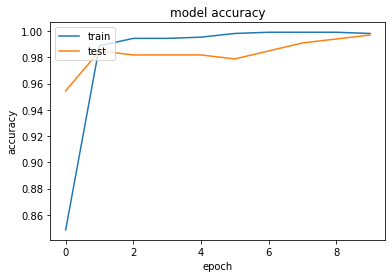

In [19]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

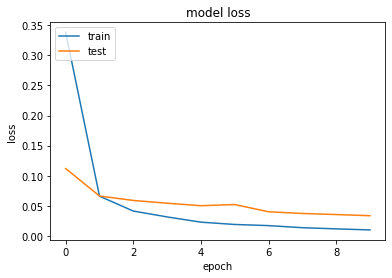

In [20]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Computer Vision/facemask.h5')